In [1]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
tqdm.pandas()
pd.set_option("display.max_columns", None)

# Process with Grade data before proceeding
Shah: Grades have outliers (eg marks=250). So we rescaled back to 0-100 using the grade (A+, A- etc)

In [2]:
final = pd.read_csv("./final.csv")
matrik = pd.read_csv("./matrik.csv")
cam_cmr = pd.read_csv("./cam_smr_2018_Sem2.csv")

C:\Users\shahr\AppData\Local\Temp\ipykernel_6384\1432770105.py:3: DtypeWarning: Columns (48) have mixed types. Specify dtype option on import or set low_memory=False.
  cam_cmr = pd.read_csv("./cam_smr_2018_Sem2.csv")


In [71]:
print(final.shape)
final.head()

(24544, 34)


,Unnamed: 0,userid,firstname,lastname,email,idnumber,institution,department,number_of_logins,number_of_sessionids,number_of_courseids,number_of_assignments,mean_posts,total_posts,question_gradedright,question_complete,question_todo,question_needsgrading,question_gradedwrong,question_gaveup,question_gradedpartial,question_invalid,question_finished,question_attempts,questionnaire_max_attempts,questionnaire_min_attempts,questionnaire_mean_attempts,number_of_quizs,quiz_max_attempt,quiz_min_attempt,quiz_mean_attempt,number_of_surveys,number_of_questions,gender
0,0,64,Kunalkumar A/l Poobathy,.,kunalkumar@siswa.um.edu.my,WIF160010,NaN,NaN,168.0,2.0,2.0,17.0,1.0,8.0,3.0,8.0,8.0,NaN,5.0,NaN,NaN,NaN,NaN,24.0,NaN,NaN,NaN,3.0,2.0,1.0,1.25,NaN,NaN,male
1,1,65,Prabbananthen A/l Santhra Mohan,.,prabba@siswa.um.edu.my,WIF160052,NaN,NaN,88.0,1.0,2.0,13.0,NaN,NaN,4.0,9.0,9.0,NaN,5.0,NaN,NaN,NaN,NaN,27.0,NaN,NaN,NaN,3.0,2.0,1.0,1.40,NaN,NaN,male
2,2,66,Muhammad Shazwar Bin Anuar,.,shazwar.a@siswa.um.edu.my,WIE160015,NaN,NaN,147.0,NaN,2.0,26.0,1.0,2.0,3.0,9.0,9.0,NaN,6.0,NaN,NaN,NaN,NaN,27.0,NaN,NaN,NaN,1.0,1.0,1.0,1.00,NaN,NaN,male
3,3,67,Syaza Izzati Binti Ibrahim,.,syazaizzati@siswa.um.edu.my,WIC160061,NaN,NaN,115.0,10.0,1.0,32.0,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,female
4,4,68,Bryan Raj A/l Peter Jabaraj,.,bryanraj@siswa.um.edu.my,WIC160008,NaN,NaN,208.0,18.0,1.0,35.0,1.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,male


In [4]:
# Check the outlier for grade, use grade to reverse calculate marks
cam_cmr[cam_cmr["Formatted agreed mark"] > 100]["high grade"].value_counts()

high grade
A     201
A-    170
B     159
B+    154
B-    142
C+     95
C      55
A+     27
C-      5
D+      1
F       1
Name: count, dtype: int64

In [5]:
avg_grade_marks = {
    "A+": 95,
    "A": 85,
    "A-": 77,
    "B+": 73,
    "B": 67,
    "B-": 63,
    "C+": 57,
    "C": 53,
    "C-": 47,
    "D+": 43,
    "D": 37,
    "F": 18
}
cam_cmr.loc[cam_cmr["Formatted agreed mark"] > 100, "Formatted agreed mark"] = cam_cmr[cam_cmr["Formatted agreed mark"] > 100]["high grade"].progress_apply(lambda x: avg_grade_marks[x])

100%|██████████| 1010/1010 [00:00<00:00, 1010073.21it/s]


In [6]:
cam_cmr["Formatted agreed mark"].describe()

count    99212.000000
mean        67.984915
std         22.892081
min          0.000000
25%         64.500000
50%         74.570000
75%         81.300000
max        100.000000
Name: Formatted agreed mark, dtype: float64

## Grade: remove null formatted agreed mark 

In [7]:
# Combine two files(matrik + cam_cmr) into grade data
grade_df = cam_cmr.merge(matrik, left_on = "Student Candidate Number", right_on="NO_MATRIK")
print(grade_df.shape)

# Remove formatted agreed mark that is null value
grade_df = grade_df.dropna(subset=["Formatted agreed mark"])
grade_df

(109319, 99)


,SPR Code,Module code,Occurrence,Academic Year code,Period Slot code,Academic Year code.1,Start Period Slot code,Actual mark - DB field,Actual grade,Actual mark check digit,Agreed mark - DB field,Agreed grade,Agreed mark check digit,Credits Passed,Result of Module,Filler,Sortname,Formatted display Non-db,Formatted agreed mark,Current Attempt,Completed number,Initial SAS status,Process Status,Process status,Year of entry,Scheme code,Level code,Credit Value,Level rank,Mark Scheme code,Validating Body code,Student Candidate Number,Title,Number of periods,high mark,high grade,Re-take module,Registration type code,Module Selection Status,Calculated Mark,Formatted Display Non DB,Calculated Grade,Latest Mark,Formatted Display Non DB.1,Latest Grade,Final assess date,SCJ Code,SCE Sequence,Reason Failure,User Defined Field 02,User Defined Field 03,User Defined Field 04,User Defined Field 05,User Defined Field 06,User Defined Field 07,User Defined Field 08,User Defined Field 09,User Defined Field 10,User Defined Field 11,User Defined Field 12,User Defined Field 13,User Defined Field 14,User Defined Field 15,User Defined Field 16,User Defined Field 17,User Defined Field 18,User Defined Field 19,User Defined Field 20,Unscaled Mark,Unscaled Mark.1,Unscaled Grade,Scaling Status,First Attempt Mark,First Att. Mark,First Attempt Grade,Diet code,PDM Sequence,Percent taught celtic,Re-assessment Mode,MMR Check status,Skip Generation,Actual Grade Point,Actual Grade Pt,Agreed Grade Point,Agreed Grade Pt,Calculated Grade Point,Calc Grade Point,Latest Grade Point,Latest Grade Pt.,First Grade Point,First Grade Pt.,Unscaled Grade Point,Unscaled GradePt,Highest Grade Point,NO_MATRIK,NO_MATRIK_LAMA,SESI_MASUK,STATUS_PENGAJIAN,FAKULTI
0,17000016/2,AVA8002,1,2018,R2,2018.0,R2,0.0,CN,NaN,0.0,CN,NaN,0.0,P,NaN,A RAHMAN,0.0,0.0,1,1,A,COM,A,2018.0,UM,5,1,NaN,MPG003,NaN,17000016/2,NaN,NaN,0.0,CN,NaN,NaN,KT0,0.0,NaN,CN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,CN,KRSAVACV001_2017_001,10.0,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,17000016/2,AVA170037,2017,LPT,A
1,17000187/3,LXHA8002,1,2018,R2,2018.0,R2,0.0,CN,NaN,0.0,CN,NaN,0.0,P,NaN,VEERIAH,0.0,0.0,1,1,A,COM,A,2018.0,UM,5,1,NaN,MPG003,NaN,17000187/3,NaN,NaN,0.0,CN,NaN,NaN,KT0,0.0,NaN,CN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,CN,KRSLHACV001_2011_001,10.0,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,17000187/3,LHA140014,2014,AK,L
2,17000330/3,AOF7001,1,2018,R2,2018.0,R2,7500.0,A-,NaN,7500.0,A-,NaN,3.0,P,NaN,MOHD SAID,75.0,75.0,1,1,A,COM,A,2018.0,UM,4,3,NaN,MPG000,NaN,17000330/3,NaN,NaN,7500.0,A-,NaN,NaN,KT0,7500.0,NaN,A-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7500.0,NaN,A-,SMMAOFCV000_2017_001,10.0,NaN,NaN,NaN,NaN,370.0,NaN,370.0,NaN,370.0,NaN,NaN,NaN,370.0,NaN,NaN,NaN,370.0,17000330/3,AOF180019,2018,TDU,A
3,17000349/2,TXGX8002,1,2018,R2,2018.0,R2,0.0,CN,NaN,0.0,CN,NaN,0.0,P,NaN,MOHD DIN A,0.0,0.0,1,1,A,COM,A,2018.0,UM,5,1,NaN,MPG003,NaN,17000349/2,NaN,NaN,0.0,CN,NaN,NaN,KT0,0.0,NaN,CN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,CN,KRSTHACV001_2011_001,10.0,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,17000349/2,THA160026,2016,AK,T
4,17000628/2,WQD7002,P2,2018,S2,2018.0,S2,8460.0,A,NaN,8460.0,A,NaN,10.0,P,NaN,TAN,84.6,84.6,1,1,A,COM,A,2018.0,UM,4,10,NaN,MPG000,NaN,17000628/2,NaN,NaN,8460.0,A,NaN,NaN,KT0,8460.0,NaN,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8460.0,NaN,A,SCWWQDCV000_2017_001,20.0,NaN,NaN,NaN,NaN,400.0,NaN,400.0,NaN,400.0,NaN,NaN,NaN,400.0,NaN,NaN,NaN,400.0,17000628/2,WQD170011,2017,GR,W
...,...,...,...,...,...,...,...,

### Shah- check nonsensible grade

<Axes: >

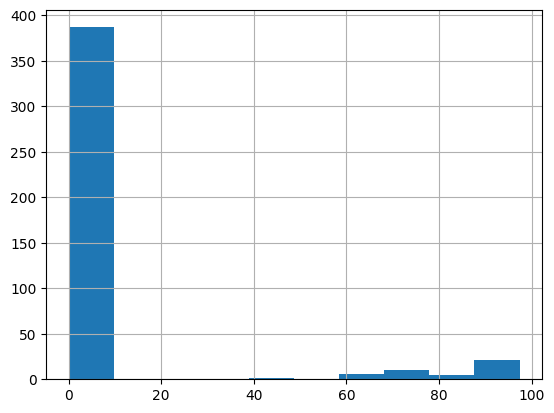

In [8]:
outliers = grade_df[grade_df['high grade']=='S']
outliers[['high grade','Formatted agreed mark']]
outliers['Formatted agreed mark'].hist()

In [72]:
print(grade_df.shape)
grade_df.info()

(99212, 99)
<class 'pandas.core.frame.DataFrame'>
Index: 99212 entries, 0 to 109318
Data columns (total 99 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   SPR Code                    99212 non-null  object 
 1   Module code                 99212 non-null  object 
 2   Occurrence                  99212 non-null  object 
 3   Academic Year code          99212 non-null  int64  
 4   Period Slot code            99212 non-null  object 
 5   Academic Year code.1        99107 non-null  float64
 6   Start Period Slot code      99212 non-null  object 
 7   Actual mark - DB field      99212 non-null  float64
 8   Actual grade                98891 non-null  object 
 9   Actual mark check digit     0 non-null      float64
 10  Agreed mark - DB field      99212 non-null  float64
 11  Agreed grade                98893 non-null  object 
 12  Agreed mark check digit     0 non-null      float64
 13  Credits Passed         

### Shah-grade + course code (not just sum)-publish

In [10]:
grade_df2 = grade_df[['NO_MATRIK_LAMA','Module code','Formatted agreed mark']]
print('No of students:',grade_df2.NO_MATRIK_LAMA.nunique())
print('No of courses:',grade_df2['Module code'].nunique())
grade_df2.info()
grade_df2.head()

No of students: 22275
No of courses: 2877
<class 'pandas.core.frame.DataFrame'>
Index: 99212 entries, 0 to 109318
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   NO_MATRIK_LAMA         99212 non-null  object 
 1   Module code            99212 non-null  object 
 2   Formatted agreed mark  99212 non-null  float64
dtypes: float64(1), object(2)
memory usage: 3.0+ MB


,NO_MATRIK_LAMA,Module code,Formatted agreed mark
0,AVA170037,AVA8002,0.0
1,LHA140014,LXHA8002,0.0
2,AOF180019,AOF7001,75.0
3,THA160026,TXGX8002,0.0
4,WQD170011,WQD7002,84.6


In [11]:
grade_df2_user = grade_df2.groupby(['NO_MATRIK_LAMA'])
grade_df2_user.head(2)

,NO_MATRIK_LAMA,Module code,Formatted agreed mark
0,AVA170037,AVA8002,0.0
1,LHA140014,LXHA8002,0.0
2,AOF180019,AOF7001,75.0
3,THA160026,TXGX8002,0.0
4,WQD170011,WQD7002,84.6
...,...,...,...
109313,IVA180090,IVA8002,0.0
109315,KGA180046,KMD7002,0.0
109316,IMA180016,IMA7002,0.0
109317,HMA180023,HMX7002,0.0


### Shah-merge grade and matrik-total marks 
contains nonsensible grade

In [12]:
# Get number of courses and marks from grade data
final_grade_df = grade_df.groupby("NO_MATRIK_LAMA").progress_apply(lambda x: pd.Series([x.shape[0], x["Formatted agreed mark"].sum()], index=["number_of_courses", "total_marks"])).reset_index()

100%|██████████| 22275/22275 [00:04<00:00, 5060.61it/s]


In [73]:
print(final_grade_df.shape)
final_grade_df

(22275, 3)


,NO_MATRIK_LAMA,number_of_courses,total_marks
0,AEB150023,2.0,148.00
1,AEC150006,1.0,93.00
2,AEC150013,5.0,324.00
3,AEC150015,2.0,121.00
4,AEC150020,1.0,87.00
...,...,...,...
22270,ZQA180042,3.0,249.14
22271,ZQA180044,3.0,217.58
22272,ZQA180045,3.0,243.39
22273,ZQA180046,4.0,247.68


### Shah-Merge (final + final_grade) and filter by date

In [14]:
# Use student from final.csv as a start to merge with remaining data
final_grade_df2 = final[["userid", "idnumber"]].merge(final_grade_df, left_on="idnumber", right_on="NO_MATRIK_LAMA")

In [15]:
final_grade_df.head()

,NO_MATRIK_LAMA,number_of_courses,total_marks
0,AEB150023,2.0,148.0
1,AEC150006,1.0,93.0
2,AEC150013,5.0,324.0
3,AEC150015,2.0,121.0
4,AEC150020,1.0,87.0


# Grade data-publish

In [74]:
print(final_grade_df2.shape)
final_grade_df2.info()
final_grade_df2.head()

(18576, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18576 entries, 0 to 18575
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   userid             18576 non-null  int64  
 1   idnumber           18576 non-null  object 
 2   NO_MATRIK_LAMA     18576 non-null  object 
 3   number_of_courses  18576 non-null  float64
 4   total_marks        18576 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 725.8+ KB


,userid,idnumber,NO_MATRIK_LAMA,number_of_courses,total_marks
0,64,WIF160010,WIF160010,6.0,362.90
1,65,WIF160052,WIF160052,6.0,321.90
2,66,WIE160015,WIE160015,7.0,472.60
3,67,WIC160061,WIC160061,6.0,429.40
4,68,WIC160008,WIC160008,7.0,600.48


In [17]:
#print("sasa)
#final_grade_df2.to_csv("final_grade_df2.csv") #PUBLISH THIS ONE

# Student_log-publish

In [18]:
# Filter student log file to speed up time (From 36204348 reduced 12,243,876 to 23,922,462 rows)

path = 'C:\\Users\\shahr\\code\\GPF_Qazi\\Qazi_data\\processed\\sess1819sem2\\'


student_log = pd.read_csv(f"{path}student_log.csv")
student_log["timecreated"] = pd.to_datetime(student_log["timecreated"], unit="s")
student_log = student_log[(student_log.timecreated >= pd.to_datetime("18-02-2019", format="%d-%m-%Y")) & (student_log.timecreated <= pd.to_datetime("30-06-2019", format="%d-%m-%Y"))].copy()

In [19]:
student_log.info()
print('number of users/students',student_log.userid.nunique())
print('number of courses',student_log.courseid.nunique())

<class 'pandas.core.frame.DataFrame'>
Index: 23922462 entries, 179 to 36203502
Data columns (total 21 columns):
 #   Column             Dtype         
---  ------             -----         
 0   id                 int64         
 1   eventname          object        
 2   component          object        
 3   action             object        
 4   target             object        
 5   objecttable        object        
 6   objectid           float64       
 7   crud               object        
 8   edulevel           int64         
 9   contextid          int64         
 10  contextlevel       int64         
 11  contextinstanceid  int64         
 12  userid             int64         
 13  courseid           int64         
 14  relateduserid      float64       
 15  anonymous          int64         
 16  other              object        
 17  timecreated        datetime64[ns]
 18  origin             object        
 19  ip                 object        
 20  realuserid         float6

In [20]:
student_log.head(3)

,id,eventname,component,action,target,objecttable,objectid,crud,edulevel,contextid,contextlevel,contextinstanceid,userid,courseid,relateduserid,anonymous,other,timecreated,origin,ip,realuserid
179,20125308,\core\event\course_viewed,core,viewed,course,NaN,NaN,r,2,2,50,1,2583,1,NaN,0,N;,2019-03-10 08:18:36,web,192.168.90.44,NaN
180,20125378,\mod_forum\event\discussion_viewed,mod_forum,viewed,discussion,forum_discussions,13917.0,r,2,224388,70,100172,24773,4106,NaN,0,N;,2019-03-10 08:19:05,web,192.168.90.44,NaN
181,20125442,\core\event\course_viewed,core,viewed,course,NaN,NaN,r,2,149506,50,3752,6473,3752,NaN,0,N;,2019-03-10 08:19:38,web,192.168.90.44,NaN


## Student_log: Process eventname

In [21]:
student_log["process_eventname"] = student_log["eventname"].str.split("\\").str[-1]
student_log2 = student_log[pd.notnull(student_log.objectid)].copy()
student_log3 = student_log[pd.isnull(student_log.objectid)].copy()

## Student_log: Process total interaction

In [22]:
ttl_interaction_df = student_log2.groupby("userid").progress_apply(lambda x: x.shape[0]).to_frame().reset_index().rename(columns={0:"total_interaction"})
ttl_interaction_df.head(3)

100%|██████████| 19693/19693 [00:24<00:00, 799.61it/s] 


,userid,total_interaction
0,64,1042
1,65,512
2,66,998


## Student_log: student login timezone

In [23]:
student_logins = student_log2[(student_log2.process_eventname == "user_loggedin")].copy()

In [24]:
student_logins = student_logins[["userid", "timecreated"]].copy()

In [25]:
# Count number of login in weekday/weekend
student_logins["weekday"] = student_logins["timecreated"].dt.weekday

In [26]:
# Count number of login in each time period
student_logins["hour"] = student_logins["timecreated"].dt.hour

In [27]:
def count_login(subset_df):
    ttl_login_cnt = len(subset_df)
    weekend_cnt = len(subset_df[subset_df["weekday"]>=5])
    weekday_cnt = len(subset_df[subset_df["weekday"]<=4])
    midnight_cnt = len(subset_df[(subset_df["hour"]<5)])
    early_morning_cnt = len(subset_df[(subset_df["hour"]>=5) & (subset_df["hour"]<=8)])
    late_morning_cnt = len(subset_df[(subset_df["hour"]>=9) & (subset_df["hour"]<12)])
    afternoon_cnt = len(subset_df[(subset_df["hour"]>=12) & (subset_df["hour"]<17)])
    evening_cnt = len(subset_df[(subset_df["hour"]>=17) & (subset_df["hour"]<21)])
    night_cnt = len(subset_df[(subset_df["hour"]>=21)])
    # holiday_cnt = len(subset_df[(((subset_df["timecreated"] >= pd.to_datetime("2019-01-21")) & (subset_df["timecreated"] <= pd.to_datetime("2019-02-17"))) | 
    #                              ((subset_df["timecreated"] >= pd.to_datetime("2019-07-01")) & (subset_df["timecreated"] <= pd.to_datetime("2019-09-08"))) | 
    #                              ((subset_df["timecreated"] >= pd.to_datetime("2020-01-20")) & (subset_df["timecreated"] <= pd.to_datetime("2020-02-16"))) | 
    #                              ((subset_df["timecreated"] >= pd.to_datetime("2020-06-29")) & (subset_df["timecreated"] <= pd.to_datetime("2020-09-13"))) | 
    #                              ((subset_df["timecreated"] >= pd.to_datetime("2021-02-15")) & (subset_df["timecreated"] <= pd.to_datetime("2021-03-07"))) | 
    #                              ((subset_df["timecreated"] >= pd.to_datetime("2021-07-19")) & (subset_df["timecreated"] <= pd.to_datetime("2021-10-03"))))])
    return pd.Series({"total_login": ttl_login_cnt, "weekend_login": weekend_cnt, "weekday_login": weekday_cnt,\
                      "midnight_login": midnight_cnt, "early_morning_login": early_morning_cnt,\
                      "late_morning_login":late_morning_cnt, "afternoon_login": afternoon_cnt,\
                      "evening_login": evening_cnt, "night_login": night_cnt}) #, "holiday_login": holiday_cnt})

In [28]:
final_login_df = student_logins.groupby("userid").progress_apply(count_login).reset_index()

100%|██████████| 19372/19372 [01:00<00:00, 318.58it/s]


In [29]:
final_login_df.head(3)

,userid,total_login,weekend_login,weekday_login,midnight_login,early_morning_login,late_morning_login,afternoon_login,evening_login,night_login
0,64,168,24,144,43,33,32,41,10,9
1,65,88,5,83,29,15,14,25,2,3
2,66,147,24,123,63,31,12,38,1,2


## Student_log:COURSES viewed

In [30]:
# Number of courses (NOT USED, USING NUMBER OF COURSES FROM GRADE DATA)
# course_df = student_log2[(student_log2.courseid != 0) & (student_log2.courseid != 1)].groupby("userid").progress_apply(lambda x: x["courseid"].nunique()).to_frame().reset_index().rename(columns={0:"no_of_courses"})
# course_df.head(3)

In [31]:
# Number of viewed course
viewed_course_df = student_log3[(student_log3.process_eventname == "course_viewed") & (student_log3.component == "core")].groupby("userid").progress_apply(lambda x: x.shape[0]).to_frame().reset_index().rename(columns={0:"no_of_viewed_courses"})
viewed_course_df.head(3)

100%|██████████| 19251/19251 [00:11<00:00, 1709.14it/s]


,userid,no_of_viewed_courses
0,64,1282
1,65,241
2,66,1508


## Student_log: ATTENDANCE

In [32]:
# Attendance
attendance_df = student_log2[(student_log2.process_eventname == "attendance_taken_by_student") & (student_log2.component == "mod_attendance")].groupby("userid").progress_apply(lambda x: x.shape[0]).to_frame().reset_index().rename(columns={0:"no_of_attendance_taken"})
attendance_df.head(3)

100%|██████████| 2040/2040 [00:00<00:00, 24361.74it/s]


,userid,no_of_attendance_taken
0,64,2
1,65,1
2,67,10


## Student_log: FILES dloaded

In [33]:
# Download all course slides
download_file_df = student_log2[(student_log2.process_eventname == "all_files_downloaded") & (student_log2.component == "mod_folder")].groupby("userid").progress_apply(lambda x: x.shape[0]).to_frame().reset_index().rename(columns={0:"no_of_all_files_downloaded"})
download_file_df.head(3)

100%|██████████| 4045/4045 [00:00<00:00, 37295.86it/s]


,userid,no_of_all_files_downloaded
0,64,1
1,65,1
2,68,9


## Student_log: ASSIGNMENTS

In [34]:
# Number of assignments
assignment_df = student_log2[(student_log2.component == "mod_assign") & (student_log2.action == "submitted")].groupby("userid").progress_apply(lambda x: x.shape[0]).to_frame().reset_index().rename(columns={0:"no_of_assignments"})
assignment_df.head(3)

100%|██████████| 13676/13676 [00:00<00:00, 30699.46it/s]


,userid,no_of_assignments
0,64,16
1,65,11
2,66,29


## Student_log: FORUMS created

In [35]:
# Number of forum post created
forum_df = student_log2[(student_log2.process_eventname == "discussion_created") & (student_log2.component == "mod_forum")].groupby("userid").progress_apply(lambda x: x.shape[0]).to_frame().reset_index().rename(columns={0:"no_of_forum_created"})
forum_df.head(3)

100%|██████████| 4885/4885 [00:00<00:00, 34028.56it/s]


,userid,no_of_forum_created
0,66,2
1,67,2
2,68,2


## Student_log: QUIZZES(attempted,completed,giveup)

In [36]:
# Number of quizes
quiz_df = student_log2[(student_log2.component == "mod_quiz") & (student_log2.process_eventname == "course_module_viewed")].groupby("userid").progress_apply(lambda x: x.shape[0]).to_frame().reset_index().rename(columns={0:"number_of_quizzes"})
quiz_df.head(3)

100%|██████████| 11422/11422 [00:00<00:00, 26857.80it/s]


,userid,number_of_quizzes
0,64,17
1,65,9
2,66,3


In [37]:
# Quizes done
quiz_done_df = student_log2[(student_log2.component == "mod_quiz") & (student_log2.process_eventname == "attempt_submitted")].groupby("userid").progress_apply(lambda x: x.shape[0]).to_frame().reset_index().rename(columns={0:"no_of_quizzes_completed"})
quiz_done_df.head(3)

100%|██████████| 10102/10102 [00:00<00:00, 27207.92it/s]


,userid,no_of_quizzes_completed
0,64,4
1,65,5
2,66,1


In [38]:
# Total attempt done for quizzes
quiz_attempt_df = student_log2[(student_log2.component == "mod_quiz") & (student_log2.process_eventname == "attempt_viewed")].groupby("userid").progress_apply(lambda x: x.shape[0]).to_frame().reset_index().rename(columns={0:"no_of_quizzes_attempt"})
quiz_attempt_df.head(3)

100%|██████████| 10209/10209 [00:00<00:00, 21741.20it/s]


,userid,no_of_quizzes_attempt
0,64,8
1,65,11
2,66,1


In [39]:
# Quiz giveup flag
quiz_giveup_df = student_log2[(student_log2.component == "mod_quiz") & (student_log2.action.isin(["becameoverdue", "abandoned"]))].groupby("userid").progress_apply(lambda x: 1).to_frame().reset_index().rename(columns={0:"f_quizzes_giveup"})
quiz_giveup_df.head(3)

100%|██████████| 227/227 [00:00<00:00, 22662.20it/s]


,userid,f_quizzes_giveup
0,1364,1
1,2073,1
2,2150,1


# Merge to final grade

In [40]:
# Use grade as the main dataframe to be merged
test = final_grade_df2.merge(final_login_df, on="userid", how="left").merge(ttl_interaction_df, on="userid", how="left").merge(viewed_course_df, on="userid", how="left").merge(attendance_df, on="userid", how="left")\
    .merge(download_file_df, on="userid", how="left").merge(assignment_df, on="userid", how="left").merge(forum_df, on="userid", how="left").merge(quiz_df, on="userid", how="left")\
    .merge(quiz_done_df, on="userid", how="left").merge(quiz_attempt_df, on="userid", how="left").merge(quiz_giveup_df, on="userid", how="left")

In [41]:
# Fill NA
test = test.fillna(0)

In [42]:
# Use grade as the main dataframe to be merged
test2 = final_grade_df2.merge(final_login_df, on="userid", how="left").merge(ttl_interaction_df, on="userid", how="left").merge(viewed_course_df, on="userid", how="left").merge(attendance_df, on="userid", how="left")\
    .merge(download_file_df, on="userid", how="left").merge(assignment_df, on="userid", how="left").merge(forum_df, on="userid", how="left").merge(quiz_df, on="userid", how="left")\
    .merge(quiz_done_df, on="userid", how="left").merge(quiz_attempt_df, on="userid", how="left").merge(quiz_giveup_df, on="userid", how="left")

In [43]:
test2.isna().sum()
#test2.head()


userid                            0
idnumber                          0
NO_MATRIK_LAMA                    0
number_of_courses                 0
total_marks                       0
total_login                    1796
weekend_login                  1796
weekday_login                  1796
midnight_login                 1796
early_morning_login            1796
late_morning_login             1796
afternoon_login                1796
evening_login                  1796
night_login                    1796
total_interaction              1667
no_of_viewed_courses           1859
no_of_attendance_taken        16549
no_of_all_files_downloaded    14779
no_of_assignments              5308
no_of_forum_created           13808
number_of_quizzes              8523
no_of_quizzes_completed        9770
no_of_quizzes_attempt          9671
f_quizzes_giveup              18352
dtype: int64

## Standardization

In [44]:
# Standardize all column based on number of courses
def standard(x):
    result_list = {}
    result_list["userid"] = x["userid"].values[0]
    result_list["number_of_courses"] = x["number_of_courses"].values[0]
    for col in [x for x in x.columns if x not in ["userid", "number_of_courses", "f_quizzes_giveup", "idnumber", "NO_MATRIK_LAMA"]]:
        result_list[col] = x[col].values[0]/x["number_of_courses"].values[0]
    result_list["f_quizzes_giveup"] = x["f_quizzes_giveup"].values[0]
    return pd.Series(result_list)
final_df = test.groupby("userid", as_index=False).progress_apply(lambda x: standard(x))
final_df = pd.DataFrame(final_df)

100%|██████████| 18576/18576 [00:14<00:00, 1275.22it/s]


## final_df

In [45]:
final_df.head()

,userid,number_of_courses,total_marks,total_login,weekend_login,weekday_login,midnight_login,early_morning_login,late_morning_login,afternoon_login,evening_login,night_login,total_interaction,no_of_viewed_courses,no_of_attendance_taken,no_of_all_files_downloaded,no_of_assignments,no_of_forum_created,number_of_quizzes,no_of_quizzes_completed,no_of_quizzes_attempt,f_quizzes_giveup
0,64.0,6.0,60.483333,28.000000,4.000000,24.000000,7.166667,5.500000,5.333333,6.833333,1.666667,1.500000,173.666667,213.666667,0.333333,0.166667,2.666667,0.000000,2.833333,0.666667,1.333333,0.0
1,65.0,6.0,53.650000,14.666667,0.833333,13.833333,4.833333,2.500000,2.333333,4.166667,0.333333,0.500000,85.333333,40.166667,0.166667,0.166667,1.833333,0.000000,1.500000,0.833333,1.833333,0.0
2,66.0,7.0,67.514286,21.000000,3.428571,17.571429,9.000000,4.428571,1.714286,5.428571,0.142857,0.285714,142.571429,215.428571,0.000000,0.000000,4.142857,0.285714,0.428571,0.142857,0.142857,0.0
3,67.0,6.0,71.566667,19.166667,2.500000,16.666667,6.333333,2.666667,1.666667,7.833333,0.333333,0.333333,131.000000,99.833333,1.666667,0.000000,6.000000,0.333333,0.000000,0.000000,0.000000,0.0
4,68.0,7.0,85.782857,29.000000,5.000000,24.000000,12.142857,5.571429,3.571429,7.000000,0.714286,0.000000,138.142857,137.285714,2.571429,1.285714,6.000000,0.285714,0.285714,0.000000,0.000000,0.0


In [46]:
final_df.describe()

,userid,number_of_courses,total_marks,total_login,weekend_login,weekday_login,midnight_login,early_morning_login,late_morning_login,afternoon_login,evening_login,night_login,total_interaction,no_of_viewed_courses,no_of_attendance_taken,no_of_all_files_downloaded,no_of_assignments,no_of_forum_created,number_of_quizzes,no_of_quizzes_completed,no_of_quizzes_attempt,f_quizzes_giveup
count,18576.000000,18576.000000,18576.000000,18576.000000,18576.000000,18576.000000,18576.000000,18576.000000,18576.000000,18576.000000,18576.000000,18576.000000,18576.000000,18576.000000,18576.000000,18576.000000,18576.000000,18576.000000,18576.000000,18576.000000,18576.000000,18576.000000
mean,12398.887489,5.126292,65.048899,17.055369,3.053399,14.001970,5.105280,4.124610,2.286923,4.170923,0.797535,0.570098,89.396379,72.371191,0.146303,0.178280,1.239883,0.122413,1.649128,0.452069,5.256248,0.012059
std,6964.251996,2.488842,24.234167,16.682656,3.601409,13.663205,5.357546,4.346097,3.566116,4.313876,1.259286,1.132513,82.625162,78.026557,0.609187,1.257996,1.764696,0.463673,3.117543,0.903011,11.183277,0.109150
min,64.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6717.750000,3.000000,64.666667,5.428571,0.750000,4.375000,1.333333,1.000000,0.375000,1.111111,0.000000,0.000000,28.000000,19.160714,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,11795.500000,6.000000,73.000000,13.750000,2.200000,11.285714,3.857143,3.142857,1.333333,3.285714,0.375000,0.250000,73.267857,52.236111,0.000000,0.000000,0.600000,0.000000,0.285714,0.000000,0.000000,0.000000
75%,17145.250000,7.000000,78.571429,24.142857,4.250000,20.000000,7.333333,5.833333,2.800000,6.000000,1.000000,0.714286,129.129464,100.517857,0.000000,0.000000,1.666667,0.125000,2.000000,0.500000,5.428571,0.000000
max,28234.000000,11.000000,100.000000,366.000000,128.000000,238.000000,107.571429,88.000000,137.000000,96.000000,40.000000,79.000000,983.000000,1360.800000,14.000000,133.857143,21.000000,15.000000,49.285714,17.000000,174.000000,1.000000


## Add student info-GENDER & YEAR INTAKE

In [47]:
# GENDER
def get_gender(name):
    if re.search("\sA/l\s", name, re.IGNORECASE):
        return "male"
    elif re.search("\sA/p\s", name, re.IGNORECASE):
        return "female"
    elif re.search(r"\sbin\s", name, re.IGNORECASE):
        return "male"
    elif re.search(r"\sbinti\s", name, re.IGNORECASE):
        return "female"
    elif re.search(r"\sb\s", name, re.IGNORECASE):
        return "male"
    elif re.search(r"\sbt\s", name, re.IGNORECASE):
        return "female"
    elif re.search(r"\sbinte\s", name, re.IGNORECASE):
        return "female"
    elif re.search(r"\sa\.l\s", name, re.IGNORECASE):
        return "male"
    elif re.search(r"\sa\.p\s", name, re.IGNORECASE):
        return "female"
    elif re.search(r"\sanak\s", name, re.IGNORECASE):
        return "male"
    elif re.search(r"\sal\s", name, re.IGNORECASE):
        return "male"
    elif re.search(r"\sA/ P\s", name, re.IGNORECASE):
        return "female"
    elif re.search(r"\ss/o\s", name, re.IGNORECASE):
        return "male"
    elif re.search(r"\sd/o\s", name, re.IGNORECASE):
        return "female"
    elif re.search(r"\sBte\s", name, re.IGNORECASE):
        return "female"
    else:
        return "unknown"
final["gender"] = final.firstname.progress_apply(lambda x: get_gender(x))

100%|██████████| 24544/24544 [00:00<00:00, 124084.83it/s]


In [48]:
# YEAR INTAKE CALCULATE TIME OF STUDIES
matrik["year_studies"] = 2019 - matrik["SESI_MASUK"]

In [49]:
student_info_df = final[["userid", "idnumber", "gender"]].merge(matrik[["NO_MATRIK_LAMA", "year_studies"]], left_on="idnumber", right_on="NO_MATRIK_LAMA")

In [50]:
student_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82427 entries, 0 to 82426
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userid          82427 non-null  int64 
 1   idnumber        19061 non-null  object
 2   gender          82427 non-null  object
 3   NO_MATRIK_LAMA  19061 non-null  object
 4   year_studies    82427 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 3.1+ MB


In [51]:
final_df = final_df.merge(student_info_df[["userid", "gender", "year_studies"]], on="userid", how="left")

In [52]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18582 entries, 0 to 18581
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   userid                      18582 non-null  float64
 1   number_of_courses           18582 non-null  float64
 2   total_marks                 18582 non-null  float64
 3   total_login                 18582 non-null  float64
 4   weekend_login               18582 non-null  float64
 5   weekday_login               18582 non-null  float64
 6   midnight_login              18582 non-null  float64
 7   early_morning_login         18582 non-null  float64
 8   late_morning_login          18582 non-null  float64
 9   afternoon_login             18582 non-null  float64
 10  evening_login               18582 non-null  float64
 11  night_login                 18582 non-null  float64
 12  total_interaction           18582 non-null  float64
 13  no_of_viewed_courses        185

In [53]:
#final_df.to_csv("./final_df3.csv", index=False)


In [54]:
#test.to_csv("./final_df_without_standardize.csv", index=False)

# EDA

In [55]:
final_df = pd.read_csv("./final_df3.csv")

## No of courses stats

In [56]:
final_df.number_of_courses.describe()

count    18576.000000
mean         5.126292
std          2.488842
min          1.000000
25%          3.000000
50%          6.000000
75%          7.000000
max         11.000000
Name: number_of_courses, dtype: float64

## Bar plot

C:\Users\shahr\AppData\Local\Temp\ipykernel_6384\2552962006.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


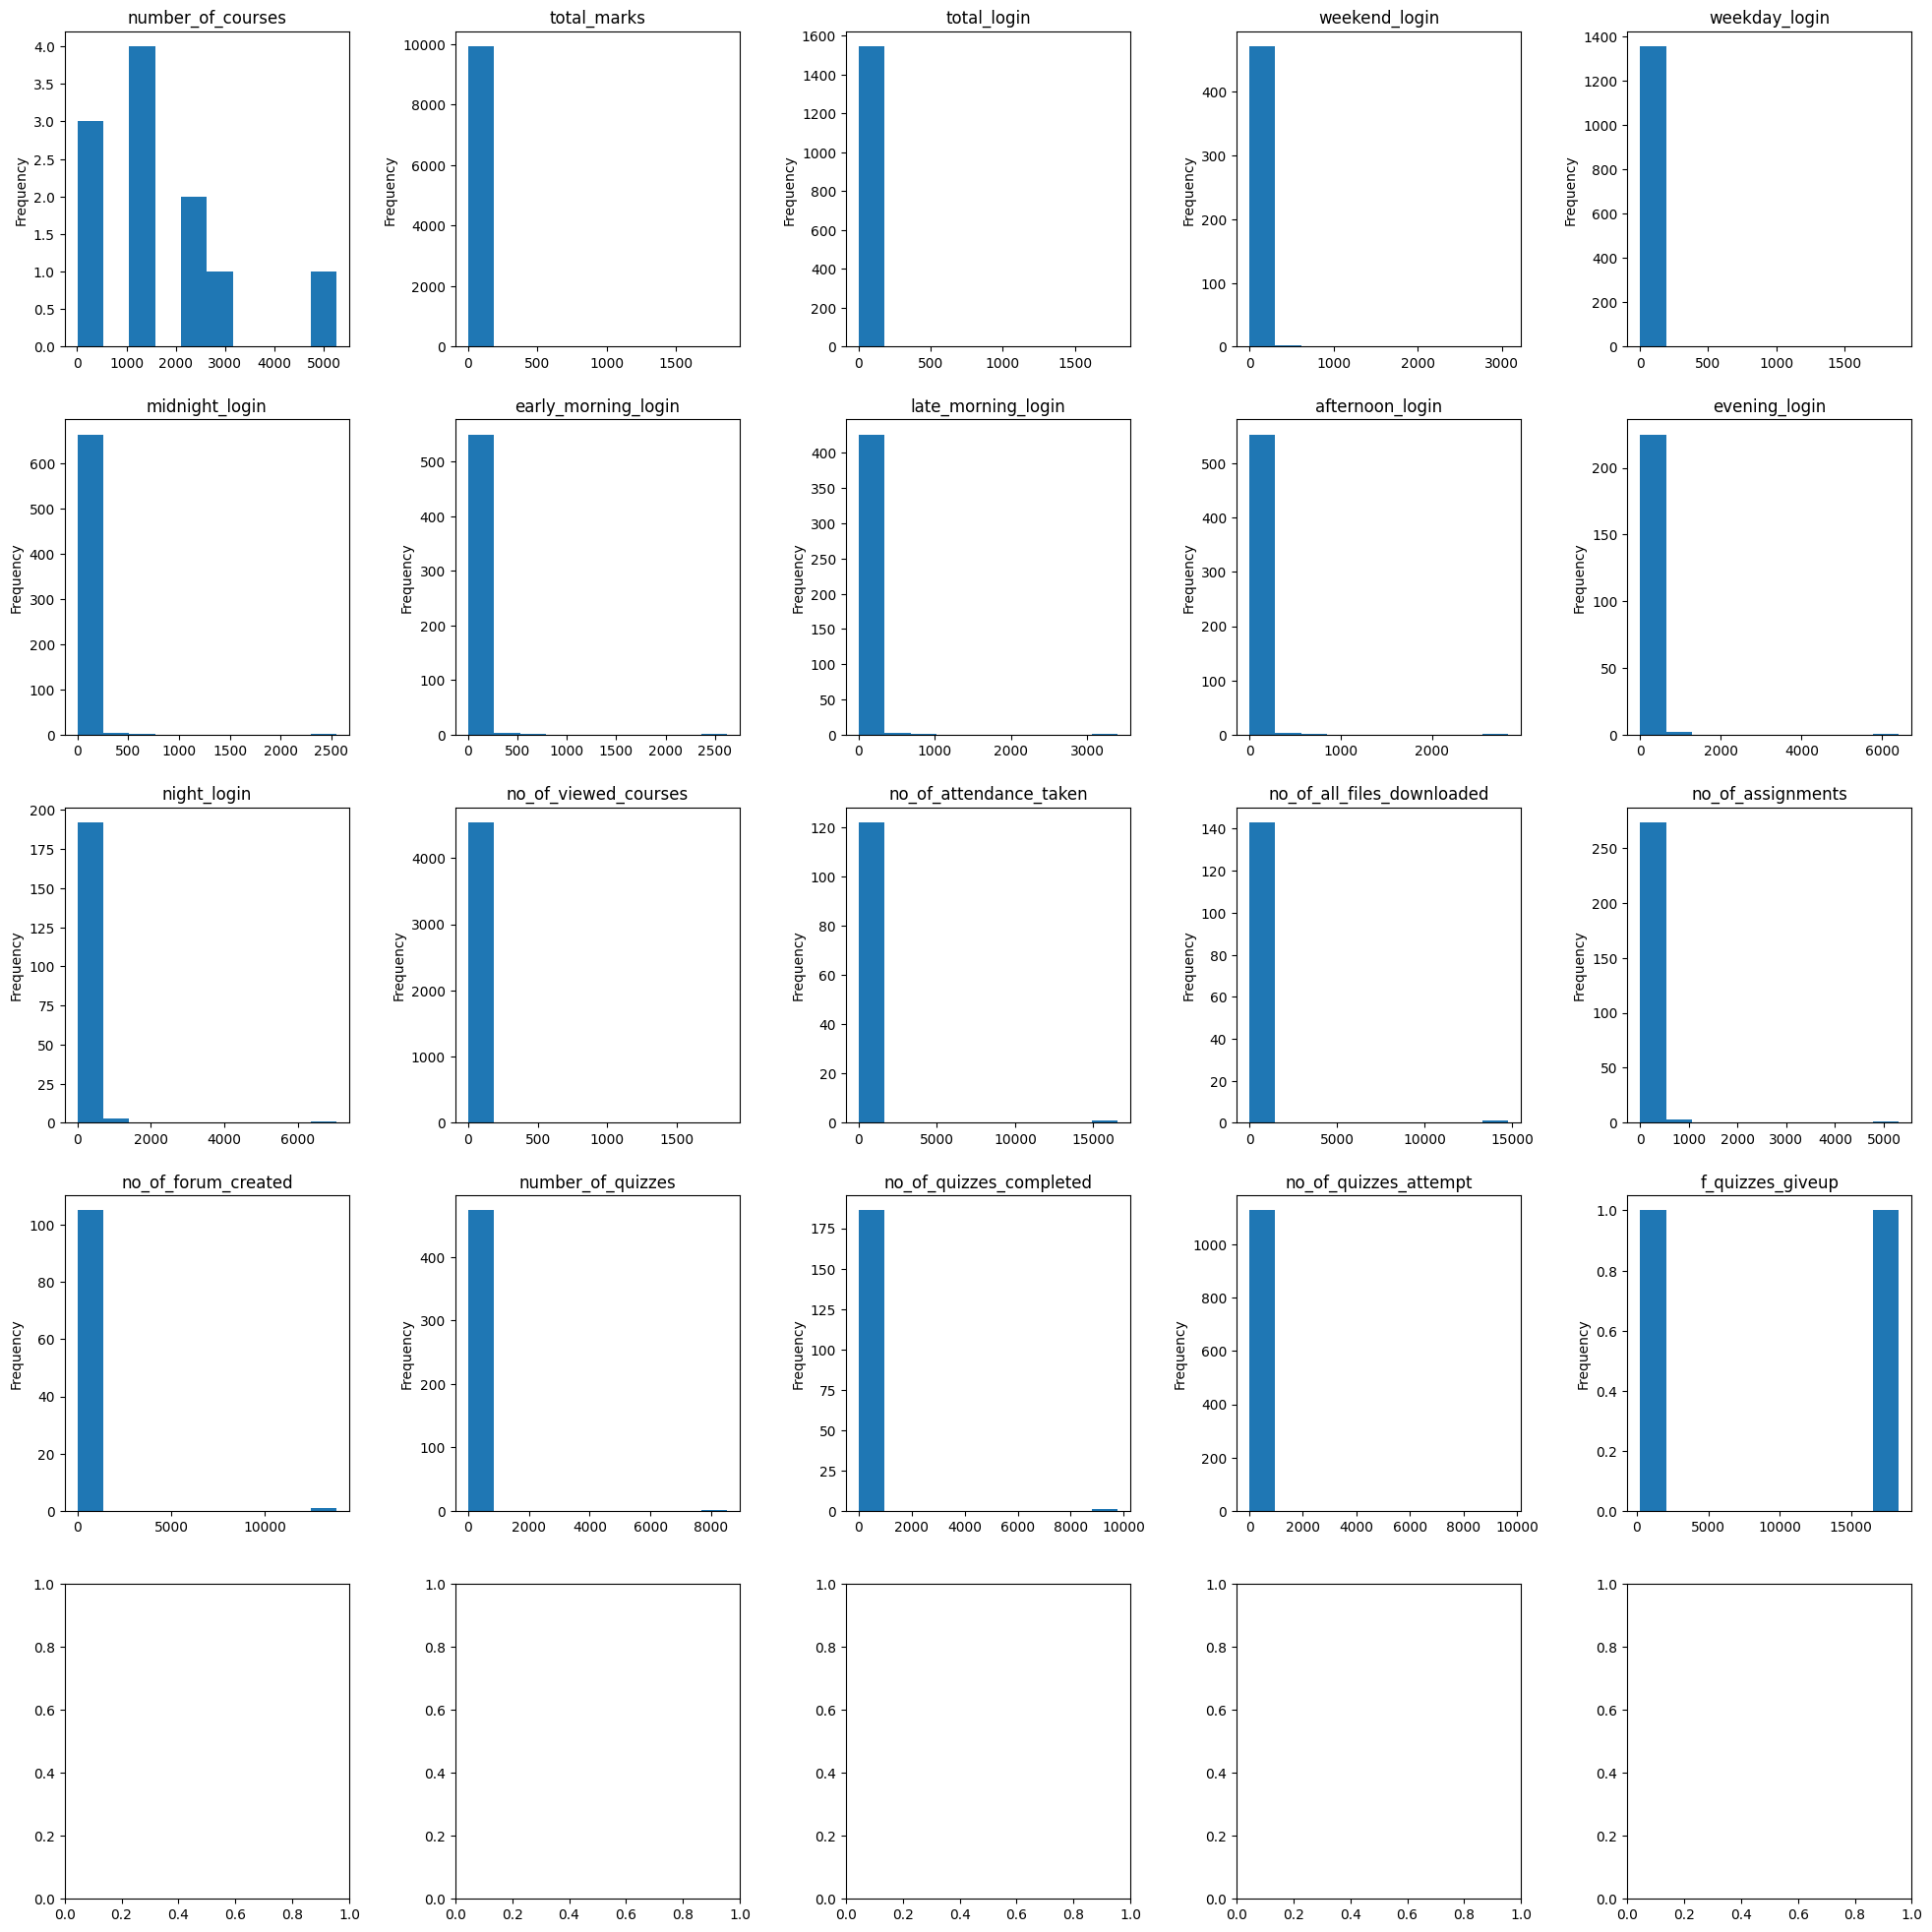

In [57]:
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(20,20))
count = 0
for col in [x for x in final_df.select_dtypes(include=["float"]).columns if x != "userid"]:
    i, j = count // 5, count % 5
    final_df[col].value_counts().plot(kind="hist", ax=axes[i, j])
    axes[i,j].set_title(col)
    count+=1
fig.tight_layout(pad=2.0)
fig.show()

## Density plot

array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>]], dtype=object)

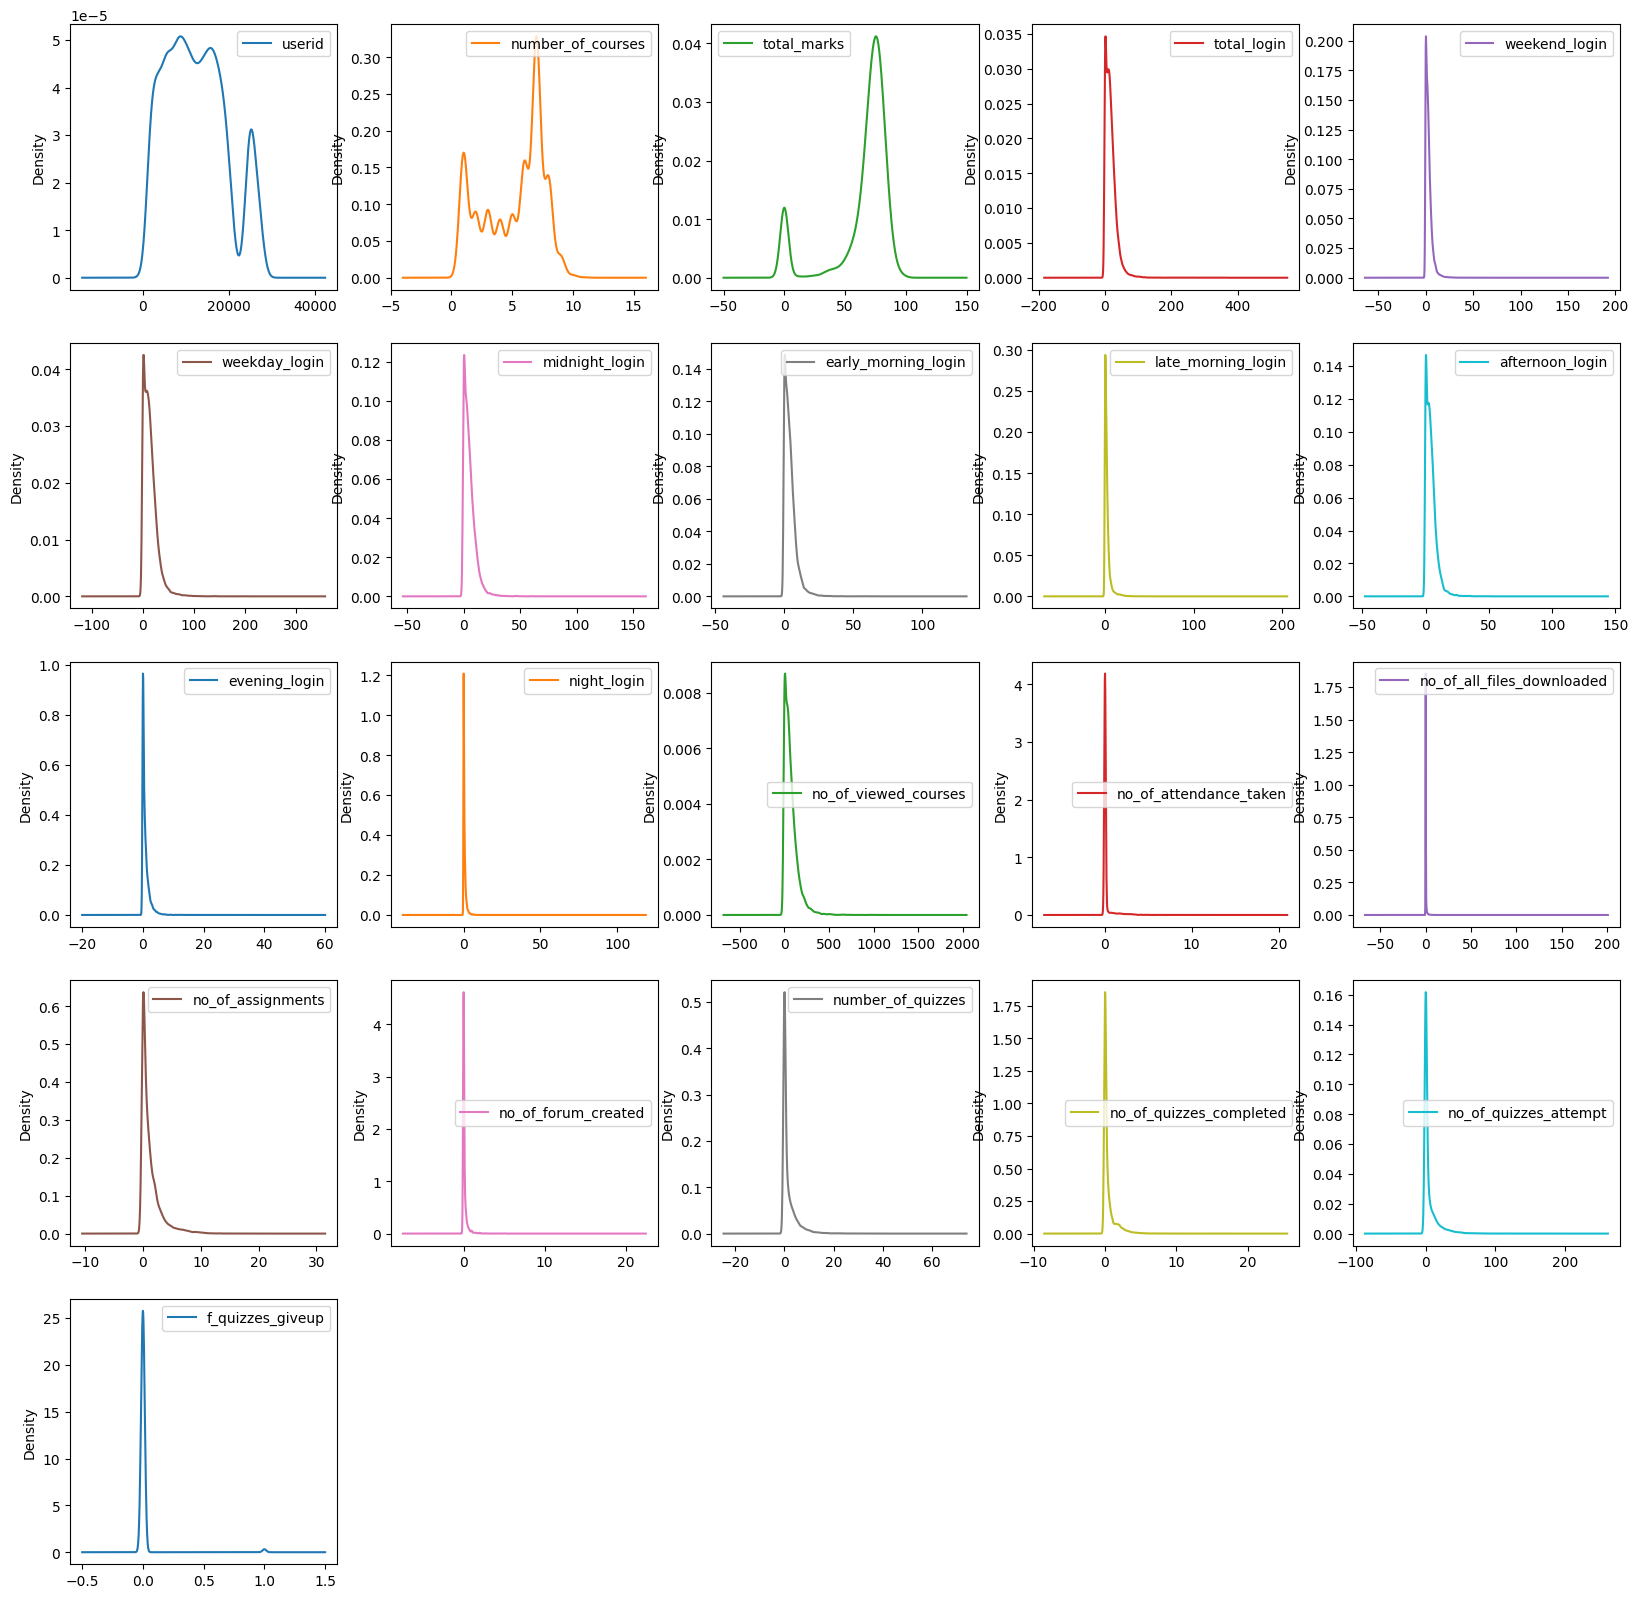

In [58]:
final_df.plot.density(subplots=True, sharex=False, sharey=False, layout=(5, 5), figsize=(20, 20))

## No Unique, all columns

In [59]:
for col in final_df.columns.tolist():
    print(col, final_df[col].nunique())

userid 18576
number_of_courses 11
total_marks 9925
total_login 1547
weekend_login 476
weekday_login 1358
midnight_login 670
early_morning_login 556
late_morning_login 431
afternoon_login 559
evening_login 228
night_login 196
no_of_viewed_courses 4539
no_of_attendance_taken 123
no_of_all_files_downloaded 144
no_of_assignments 277
no_of_forum_created 106
number_of_quizzes 474
no_of_quizzes_completed 187
no_of_quizzes_attempt 1129
f_quizzes_giveup 2


## Check missing values

In [60]:
# Check missing value
((final_df.isna().sum() / len(final_df)) * 100).sort_values(ascending=False)

userid                        0.0
night_login                   0.0
no_of_quizzes_attempt         0.0
no_of_quizzes_completed       0.0
number_of_quizzes             0.0
no_of_forum_created           0.0
no_of_assignments             0.0
no_of_all_files_downloaded    0.0
no_of_attendance_taken        0.0
no_of_viewed_courses          0.0
evening_login                 0.0
number_of_courses             0.0
afternoon_login               0.0
late_morning_login            0.0
early_morning_login           0.0
midnight_login                0.0
weekday_login                 0.0
weekend_login                 0.0
total_login                   0.0
total_marks                   0.0
f_quizzes_giveup              0.0
dtype: float64

## Discretization

In [61]:
# Discretize all numerical value into 3 bins
for col in [x for x in final_df.columns.tolist() if x not in ["userid", "f_quizzes_giveup", "total_marks", "gender"]]:
    final_df[col] = pd.qcut(final_df[col], q=3, precision=0, duplicates="drop")

In [62]:
# Processed total_marks into grading
def grade_map(x):
    if x >= 75:
        return "distinction"
    elif x >= 60:
        return "good"
    elif x >= 50:
        return "pass"
    else:
        return "fail"
final_df["grade"] = final_df["total_marks"].progress_apply(grade_map)
final_df = final_df.drop("total_marks", axis = 1)

100%|██████████| 18576/18576 [00:00<00:00, 875637.97it/s]


## Bar plots, discretized into 4 bins

C:\Users\shahr\AppData\Local\Temp\ipykernel_6384\2361628606.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


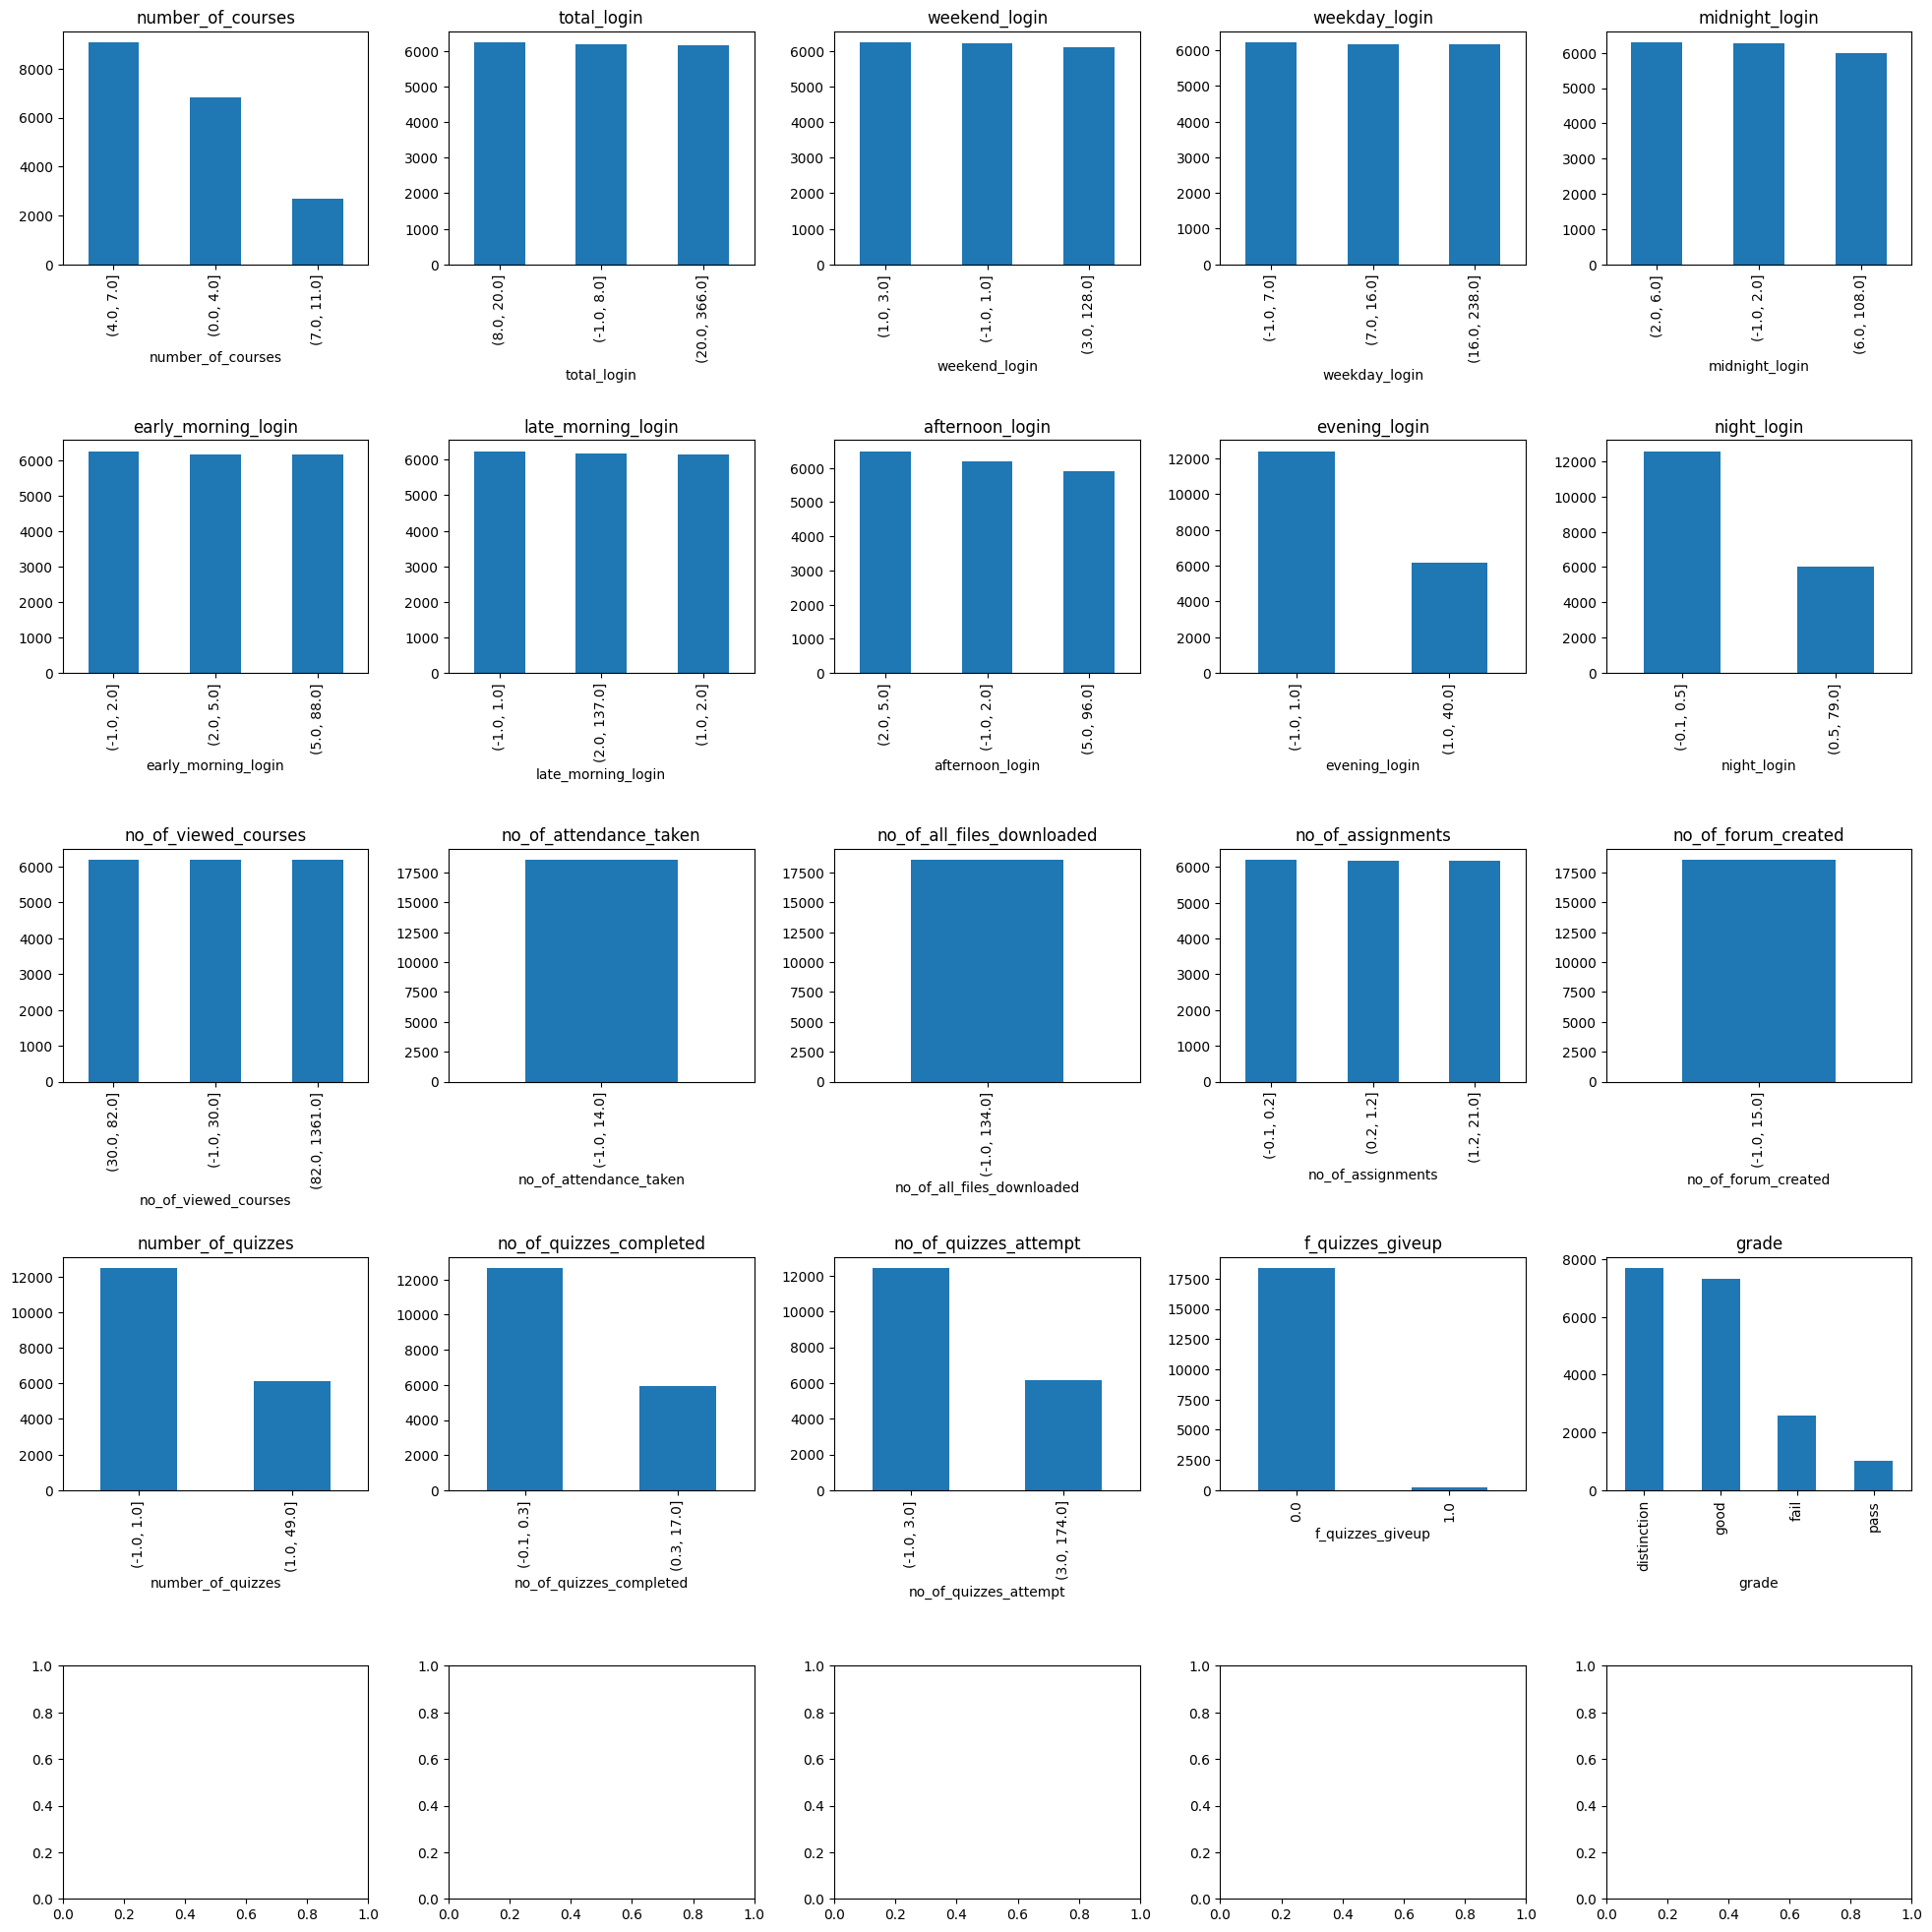

In [63]:
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(20,20))
count = 0
for col in [x for x in final_df.columns.tolist() if x not in ["userid"]]:
    i, j = count // 5, count % 5
    final_df[col].value_counts().plot(kind="bar", ax=axes[i, j])
    axes[i,j].set_title(col)
    count+=1
fig.tight_layout(pad=2.0)
fig.show()

## Drop col with 1 value

In [64]:
# Drop column with 1 value
col_list = []
for col in final_df.columns:
    if final_df[col].nunique() == 1:
        col_list.append(col)
final_df = final_df.drop(col_list, axis = 1)

In [65]:
final_df.shape

(18576, 18)

In [66]:
print("Number of column:", len(col_list))

Number of column: 3


In [70]:
#final_df.to_csv("./df_for_prediction.csv", index=False)

print(final_grade_df2.shape)
print(final_df.shape)

(18576, 5)
(18576, 18)


In [68]:
print(sasa)

NameError: name 'sasa' is not defined

# Prediction

In [ ]:
import xgboost

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
# from lightgbm import LGBMClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

from sklearn.multiclass import OneVsRestClassifier

In [ ]:
final_df = pd.read_csv("./df_for_prediction.csv")

In [ ]:
final_df.info()
final_df.head()

In [ ]:
# Label encode
for col in final_df.select_dtypes(include="object").columns:
    final_df[col] = final_df[col].astype("category").cat.codes

In [ ]:
y = final_df["grade"]
X = final_df.drop(["grade", "userid"], axis = 1)

In [ ]:
def evaluate_model(X, y):
    result_list = {}
    model_list = ["CART", "RF", "XGB", "SVM", "NB", "KNN", "VS"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8, random_state = 22)
    for model in tqdm(model_list):
        if model == "CART":
            selected_model = DecisionTreeClassifier(random_state = 22)
        elif model == "RF":
            selected_model = RandomForestClassifier(random_state = 22)
        elif model == "XGB":
            selected_model = XGBClassifier(random_state = 22)
        elif model == "LGBM":
            # selected_model = LGBMClassifier(random_state = 22)
            pass
        elif model == "SVM":
            selected_model = SVC(random_state = 22)
        elif model == "KNN":
            knn_classifier = KNeighborsClassifier()
        elif model == "NB":
            selected_model = GaussianNB()
        elif model == "VS":
            selected_model = OneVsRestClassifier(XGBClassifier(random_state=22))
        else:
            pass
        selected_model.fit(X_train, y_train)
        y_pred = selected_model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred, average='weighted')
        precision = precision_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')
        result_list[model] = {"acc": round(acc*100, 2)}#, "recall": round(recall, 2), "precision": round(precision, 2), "f1": round(f1, 2)}
    return result_list

In [ ]:
result_list = evaluate_model(X, y)

In [ ]:
result_list

In [ ]:
result_df = pd.DataFrame(result_list)

In [ ]:
result_df

### TRY PREDICTION USING NEURAL NETWORK

In [ ]:
from keras.optimizers import SGD

In [ ]:
def neural_network():
    nn = Sequential()
    nn.add(Dense(100, activation="relu"))
    nn.add(Dense(50, activation="relu"))
    nn.add(Dense(25, activation="relu"))
    nn.add(Dense(10, activation="relu"))
    nn.add(Dense(4, activation='softmax'))
    nn.compile(loss="categorical_crossentropy", optimizer=SGD(), metrics=["accuracy"])
    return nn

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8, random_state = 22)

In [ ]:
y_train = to_categorical(y_train, num_classes=4)

In [ ]:
selected_model = neural_network()

In [ ]:
history = selected_model.fit(X_train, y_train, epochs=25, batch_size=100, verbose=1)

In [ ]:
selected_model.evaluate(X_test, to_categorical(y_test, num_classes=4))

### SHAP VALUE

In [ ]:
import shap

In [ ]:
# Use XGB Model
selected_model = XGBClassifier(random_state = 22)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 22)
selected_model.fit(X_train, y_train)

In [ ]:
y_pred = selected_model.predict(X_test)
accuracy_score(y_test, y_pred)

In [ ]:
explainer = shap.TreeExplainer(selected_model)
shap_values = explainer.shap_values(X)

In [ ]:
shap.summary_plot(shap_values, X, plot_type="bar")

# SWITCH TO BINARY PREDICTION

In [ ]:
final_df = pd.read_csv("./df_for_prediction.csv")

In [ ]:
final_df.grade.value_counts()

In [ ]:
final_df["new_grade"] = final_df["grade"].progress_apply(lambda x: 1 if x == "distinction" or x == "good" else 0)

In [ ]:
final_df = final_df.drop("grade", axis = 1)

In [ ]:
# Label encode
for col in final_df.select_dtypes(include="object").columns:
    final_df[col] = final_df[col].astype("category").cat.codes

In [ ]:
y = final_df["new_grade"]
X = final_df.drop(["new_grade", "userid"], axis = 1)

In [ ]:
def evaluate_model(X, y):
    result_list = {}
    model_list = ["CART", "RF", "XGB", "SVM", "NB", "KNN", "VS"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8, random_state = 22)
    for model in tqdm(model_list):
        if model == "CART":
            selected_model = DecisionTreeClassifier(random_state = 22)
        elif model == "RF":
            selected_model = RandomForestClassifier(random_state = 22)
        elif model == "XGB":
            selected_model = XGBClassifier(random_state = 22)
        elif model == "LGBM":
            # selected_model = LGBMClassifier(random_state = 22)
            pass
        elif model == "SVM":
            selected_model = SVC(random_state = 22)
        elif model == "KNN":
            knn_classifier = KNeighborsClassifier()
        elif model == "NB":
            selected_model = GaussianNB()
        elif model == "VS":
            selected_model = OneVsRestClassifier(XGBClassifier(random_state=22))
        else:
            pass
        selected_model.fit(X_train, y_train)
        y_pred = selected_model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        result_list[model] = {"acc": round(acc*100, 2), "recall": round(recall, 2), "precision": round(precision, 2), "f1": round(f1, 2)}
    return result_list

In [ ]:
result_list = evaluate_model(X, y)

In [ ]:
result_list

In [ ]:
result_df = pd.DataFrame(result_list)

In [ ]:
result_df

In [ ]:
final_df.new_grade.value_counts()

In [ ]:
pd.read_csv("./df_for_prediction.csv").grade.value_counts()

# UNDERSAMPLING

In [ ]:
final_df = pd.read_csv("./df_for_prediction.csv")

In [ ]:
final_df.grade.value_counts()

In [ ]:
final_df["new_grade"] = final_df["grade"].progress_apply(lambda x: 1 if x == "distinction" or x == "good" else 0)

In [ ]:
# Undersample
sample_value = final_df.new_grade.value_counts().tail(1).values[0]
true_df = final_df[final_df.new_grade == 1].sample(sample_value)
final_df = pd.concat([true_df, final_df[final_df.new_grade == 0]])

In [ ]:
final_df = final_df.drop("grade", axis = 1)

In [ ]:
# Label encode
for col in final_df.select_dtypes(include="object").columns:
    final_df[col] = final_df[col].astype("category").cat.codes

In [ ]:
y = final_df["new_grade"]
X = final_df.drop(["new_grade", "userid"], axis = 1)

In [ ]:
result_list = evaluate_model(X, y)

In [ ]:
result_list

In [ ]:
result_df = pd.DataFrame(result_list)

In [ ]:
result_df

# OVERSAMPLING

In [ ]:
from imblearn.over_sampling import RandomOverSampler

In [ ]:
final_df = pd.read_csv("./df_for_prediction.csv")

In [ ]:
final_df.grade.value_counts()

In [ ]:
final_df["new_grade"] = final_df["grade"].progress_apply(lambda x: 1 if x == "distinction" or x == "good" else 0)

In [ ]:
final_df = final_df.drop("grade", axis = 1)

In [ ]:
# Label encode
for col in final_df.select_dtypes(include="object").columns:
    final_df[col] = final_df[col].astype("category").cat.codes

In [ ]:
y = final_df["new_grade"]
X = final_df.drop(["new_grade", "userid"], axis = 1)

In [ ]:
oversample = RandomOverSampler(sampling_strategy='minority')

In [ ]:
X_over, y_over = oversample.fit_resample(X, y)

In [ ]:
final_df.new_grade.value_counts()

In [ ]:
y_over.value_counts()

In [ ]:
result_list = evaluate_model(X_over, y_over)

In [ ]:
result_list

In [ ]:
result_df = pd.DataFrame(result_list)

In [ ]:
result_df

# Compare with Distinction & Good & Pass vs Fail

In [ ]:
final_df = pd.read_csv("./df_for_prediction.csv")

In [ ]:
final_df.grade.value_counts()

In [ ]:
final_df["new_grade"] = final_df["grade"].progress_apply(lambda x: 0 if x == "fail" else 1)

In [ ]:
final_df = final_df.drop("grade", axis = 1)

In [ ]:
# Label encode
for col in final_df.select_dtypes(include="object").columns:
    final_df[col] = final_df[col].astype("category").cat.codes

In [ ]:
y = final_df["new_grade"]
X = final_df.drop(["new_grade", "userid"], axis = 1)

In [ ]:
result_list = evaluate_model(X, y)

In [ ]:
result_list

In [ ]:
result_df = pd.DataFrame(result_list)

In [ ]:
result_df

# UNDERSAMPLING

In [ ]:
final_df = pd.read_csv("./df_for_prediction.csv")

In [ ]:
final_df.grade.value_counts()

In [ ]:
final_df["new_grade"] = final_df["grade"].progress_apply(lambda x: 0 if x == "fail" else 1)

In [ ]:
# Undersample
sample_value = final_df.new_grade.value_counts().tail(1).values[0]
true_df = final_df[final_df.new_grade == 1].sample(sample_value)
final_df = pd.concat([true_df, final_df[final_df.new_grade == 0]])

In [ ]:
final_df = final_df.drop("grade", axis = 1)

In [ ]:
# Label encode
for col in final_df.select_dtypes(include="object").columns:
    final_df[col] = final_df[col].astype("category").cat.codes

In [ ]:
y = final_df["new_grade"]
X = final_df.drop(["new_grade", "userid"], axis = 1)

In [ ]:
result_list = evaluate_model(X, y)

In [ ]:
result_list

In [ ]:
result_df = pd.DataFrame(result_list)

In [ ]:
result_df

# OVERSAMPLING

In [ ]:
from imblearn.over_sampling import RandomOverSampler

In [ ]:
final_df = pd.read_csv("./df_for_prediction.csv")

In [ ]:
final_df.grade.value_counts()

In [ ]:
final_df["new_grade"] = final_df["grade"].progress_apply(lambda x: 0 if x == "fail" else 1)

In [ ]:
final_df = final_df.drop("grade", axis = 1)

In [ ]:
# Label encode
for col in final_df.select_dtypes(include="object").columns:
    final_df[col] = final_df[col].astype("category").cat.codes

In [ ]:
y = final_df["new_grade"]
X = final_df.drop(["new_grade", "userid"], axis = 1)

In [ ]:
oversample = RandomOverSampler(sampling_strategy='minority')

In [ ]:
X_over, y_over = oversample.fit_resample(X, y)

In [ ]:
final_df.new_grade.value_counts()

In [ ]:
y_over.value_counts()

In [ ]:
result_list = evaluate_model(X_over, y_over)

In [ ]:
result_list

In [ ]:
result_df = pd.DataFrame(result_list)

In [ ]:
result_df